In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

- ÁîüÊàêÊ®°ÊãüÊï∞ÊçÆ

In [2]:
def linearModel(X: torch.tensor, w: torch.tensor)-> torch.tensor:
    return X@w.reshape(-1, 1)

In [3]:
# ÁîüÊàêÊï∞ÊçÆ
true_w = torch.tensor([2, -3.4, 4.2])  # ÊùÉÈáç+ÂÅèÁΩÆ
num_inputs = true_w.numel()  # ÊùÉÈáçÊï∞Èáè(true_w‰∏≠ÂÖÉÁ¥†‰∏™Êï∞)
num_examples = 1000  # Ê†∑Êú¨Êï∞Èáè
features = torch.cat([torch.randn(num_examples, num_inputs - 1), torch.ones(num_examples).reshape(-1, 1)], axis=1 ) # ÈöèÊú∫ÁîüÊàê1000‰∏™ÁâπÂæÅ(1000*2) Âä†‰∏äÂÅèÁΩÆ
labels = linearModel(features, true_w) + torch.randn(num_examples).reshape(-1, 1) * 0.01  # Â∞ÜÈöèÊú∫ÁîüÊàêÁöÑÁâπÂæÅËæìÂÖ•linearModelÔºåÁÑ∂ÂêéÂä†ÂÖ•ÈöèÊú∫È°πÔºàË°®Á§∫ÂÅèÂ∑ÆÔºâ

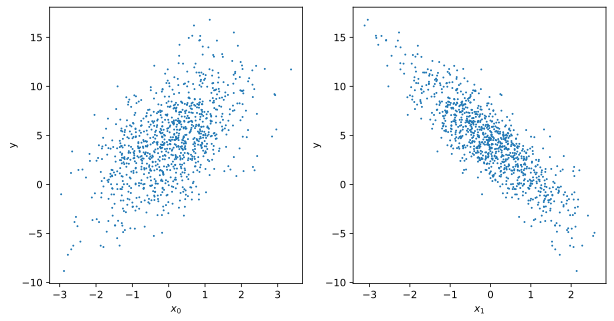

In [4]:
plt.rcParams['figure.figsize'] = (8, 3)
fig = plt.figure(figsize=(10,5))
# yÈöèÁ¨¨1‰∏™ÁâπÂæÅx_0ÁöÑÊï£ÁÇπÂõæ
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("y")
ax1.scatter(features[:, 0].numpy(), labels.numpy(), s=1)
# yÈöèÁ¨¨2‰∏™ÁâπÂæÅx_1ÁöÑÊï£ÁÇπÂõæ
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("y")
ax2.scatter(features[:, 1].numpy(), labels.numpy(), s=1)
fig

- `mse`ÊçüÂ§±ÂáΩÊï∞

In [5]:
def meanSquaredLoss(X: torch.tensor, y: torch.tensor, w: torch.tensor) -> torch.tensor:
    """
    y: Ê†áÁ≠æ
    """
    hat_y = X @ w.reshape(-1, 1)
    sLoss = torch.dot(hat_y.reshape(-1) - y.reshape(-1), hat_y.reshape(-1) - y.reshape(-1)) / y.numel()
    return sLoss

In [6]:
def grad_mse_w(X, y, w):
    '''
    X: N*a, N‰∏∫Ê†∑Êú¨Êï∞ÈáèÔºåa‰∏∫ÔºàÂ¢ûÂπøÔºâÁâπÂæÅÁª¥Â∫¶
    y: N
    w: a*1
    '''
    return 2*(X.t()@(X@w.reshape(-1, 1) - y.reshape(-1, 1))) / y.numel()

- ÊµãËØïÂáΩÊï∞

In [7]:
def f(x):
    """
    ÂáΩÊï∞: f(x0, x1) = x0**2 + 2*x1**2
    """
    return x[0] ** 2 + 2 * x[1] ** 2  # objective

def grad_f(x):
    """
    f(x)ÁöÑÊ¢ØÂ∫¶
    """
    return np.array([2 * x[0], 4 * x[1]])  # gradient

## 1. Ê¢ØÂ∫¶‰∏ãÈôç(gradient descendent)

- Ëß£Èáä1

ÂÅáËÆæÁõÆÊ†áÂáΩÊï∞$f: \mathbb{R}^d \rightarrow \mathbb{R}$ÁöÑËæìÂÖ•ÊòØ‰∏Ä‰∏™$d$Áª¥ÂêëÈáè$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$„ÄÇÁõÆÊ†áÂáΩÊï∞$f(\boldsymbol{x})$ÊúâÂÖ≥$\boldsymbol{x}$ÁöÑÊ¢ØÂ∫¶ÊòØ‰∏Ä‰∏™Áî±$d$‰∏™ÂÅèÂØºÊï∞ÁªÑÊàêÁöÑÂêëÈáèÔºö

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$

‰∏∫Ë°®Á§∫ÁÆÄÊ¥ÅÔºåÊàë‰ª¨Áî®$\nabla f(\boldsymbol{x})$‰ª£Êõø$\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$„ÄÇÊ¢ØÂ∫¶‰∏≠ÊØè‰∏™ÂÅèÂØºÊï∞ÂÖÉÁ¥†$\partial f(\boldsymbol{x})/\partial x_i$‰ª£Ë°®ÁùÄ$f$Âú®$\boldsymbol{x}$ÊúâÂÖ≥ËæìÂÖ•$x_i$ÁöÑÂèòÂåñÁéá„ÄÇ‰∏∫‰∫ÜÊµãÈáè$f$Ê≤øÁùÄÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$ÔºàÂç≥$\|\boldsymbol{u}\|=1$ÔºâÊñπÂêë‰∏äÁöÑÂèòÂåñÁéáÔºåÂú®Â§öÂÖÉÂæÆÁßØÂàÜ‰∏≠ÔºåÊàë‰ª¨ÂÆö‰πâ$f$Âú®$\boldsymbol{x}$‰∏äÊ≤øÁùÄ$\boldsymbol{u}$ÊñπÂêëÁöÑÊñπÂêëÂØºÊï∞‰∏∫

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0}  \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

‰ª•‰∏äÊñπÂêëÂØºÊï∞ÂèØ‰ª•ÊîπÂÜô‰∏∫

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

ÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$ÁªôÂá∫‰∫Ü$f$Âú®$\boldsymbol{x}$‰∏äÊ≤øÁùÄÊâÄÊúâÂèØËÉΩÊñπÂêëÁöÑÂèòÂåñÁéá„ÄÇ‰∏∫‰∫ÜÊúÄÂ∞èÂåñ$f$ÔºåÊàë‰ª¨Â∏åÊúõÊâæÂà∞$f$ËÉΩË¢´Èôç‰ΩéÊúÄÂø´ÁöÑÊñπÂêë„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$Êù•ÊúÄÂ∞èÂåñÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$„ÄÇ

Áî±‰∫é$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \|\nabla f(\boldsymbol{x})\| \cdot \|\boldsymbol{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\boldsymbol{x})\|  \cdot \text{cos} (\theta)$Ôºå
ÂÖ∂‰∏≠$\theta$‰∏∫Ê¢ØÂ∫¶$\nabla f(\boldsymbol{x})$ÂíåÂçï‰ΩçÂêëÈáè$\boldsymbol{u}$‰πãÈó¥ÁöÑÂ§πËßíÔºåÂΩì$\theta = \pi$Êó∂Ôºå$\text{cos}(\theta)$ÂèñÂæóÊúÄÂ∞èÂÄº$-1$„ÄÇÂõ†Ê≠§ÔºåÂΩì$\boldsymbol{u}$Âú®Ê¢ØÂ∫¶ÊñπÂêë$\nabla f(\boldsymbol{x})$ÁöÑÁõ∏ÂèçÊñπÂêëÊó∂ÔºåÊñπÂêëÂØºÊï∞$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$Ë¢´ÊúÄÂ∞èÂåñ„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂèØËÉΩÈÄöËøáÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÊù•‰∏çÊñ≠Èôç‰ΩéÁõÆÊ†áÂáΩÊï∞$f$ÁöÑÂÄºÔºö

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

ÂêåÊ†∑ÔºåÂÖ∂‰∏≠$\eta$ÔºàÂèñÊ≠£Êï∞ÔºâÁß∞‰ΩúÂ≠¶‰π†Áéá„ÄÇ

- Ëß£Èáä2

ËÄÉËôë$\mathbf{x} \in \mathbb{R}^d$, ÂÖ∂‰∏≠$\mathbf{x}$‰∏∫ÂêëÈáè, ÁõÆÊ†áÂáΩÊï∞$f: \mathbb{R}^d \to \mathbb{R}$Êò†Â∞ÑËá≥Ê†áÈáè„ÄÇÂØπÂ∫îÁöÑ$f$ÂÖ≥‰∫é$\mathbf{x}$ÊØè‰∏ÄÁª¥Â∫¶$x_i$ÁöÑÂÅèÂØºÊûÑÊàêÊ¢ØÂ∫¶

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Âà©Áî®Ê≥∞ÂãíÂ±ïÂºÄÂºèÂèØÂæó

$$f(\mathbf{x} + \Delta x) = f(\mathbf{x}) + \Delta\mathbf{x}^\top \nabla f(\mathbf{x}) + O(|\mathbf{\Delta x}|^2).$$ 

Êç¢ËÄåË®Ä‰πãÔºåÊúÄÈÄü‰∏ãÈôçÊñπÂêëÁî±$-\nabla f(\mathbf{x})$ÁªôÂá∫„ÄÇ‰ª§$\Delta \mathbf{x}=-\eta \nabla f(\mathbf{x})$

$$f(\mathbf{x} + \Delta x) = f(\mathbf{x}) - \eta \nabla f(\mathbf{x})^T \nabla f(\mathbf{x}) + O(|\Delta x|^2).$$ 

ÈÄâÂÆöÂêàÈÄÇÁöÑÂ≠¶‰π†Áéá$\eta > 0$ÔºåÂàôÂèØÂæóÊ¢ØÂ∫¶‰∏ãÈôçÊõ¥Êñ∞ÂÖ¨Âºè

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$$

ÊâπÈáèÊ¢ØÂ∫¶‰∏ãÈôçÊ≥ïÂú®ÊØèÊ¨°Ëø≠‰ª£Êó∂ÈúÄË¶ÅËÆ°ÁÆóÊØè‰∏™Ê†∑Êú¨‰∏äÊçüÂ§±ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶Âπ∂Ê±ÇÂíå„ÄÇÂΩìËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊ†∑Êú¨Êï∞ÈáèùëÅÂæàÂ§ßÊó∂ÔºåÁ©∫Èó¥Â§çÊùÇÂ∫¶ÊØîËæÉÈ´òÔºåÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰πüÂæàÂ§ß„ÄÇ

**ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç**

> $f_i(\boldsymbol{x})$ÊòØÊúâÂÖ≥Á¥¢Âºï‰∏∫$i$ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨ÁöÑÊçüÂ§±ÂáΩÊï∞Ôºå$n$ÊòØËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨Êï∞Ôºå$\boldsymbol{x}$ÊòØÊ®°ÂûãÁöÑÂèÇÊï∞ÂêëÈáèÔºåÈÇ£‰πàÁõÆÊ†áÂáΩÊï∞ÂÆö‰πâ‰∏∫
> 
> $$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$
> 
> ÁõÆÊ†áÂáΩÊï∞Âú®$\boldsymbol{x}$Â§ÑÁöÑÊ¢ØÂ∫¶ËÆ°ÁÆó‰∏∫
> 
>$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$
>
> Â¶ÇÊûú‰ΩøÁî®Ê¢ØÂ∫¶‰∏ãÈôçÔºåÊØèÊ¨°Ëá™ÂèòÈáèËø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰∏∫$\mathcal{O}(n)$ÔºåÂÆÉÈöèÁùÄ$n$Á∫øÊÄßÂ¢ûÈïø„ÄÇÂõ†Ê≠§ÔºåÂΩìËÆ≠ÁªÉÊï∞ÊçÆÊ†∑Êú¨Êï∞ÂæàÂ§ßÊó∂ÔºåÊ¢ØÂ∫¶‰∏ãÈôçÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄÂæàÈ´ò„ÄÇ
>
> ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÔºàstochastic gradient descentÔºåSGDÔºâÂáèÂ∞ë‰∫ÜÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ„ÄÇÂú®ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôçÁöÑÊØèÊ¨°Ëø≠‰ª£‰∏≠ÔºåÊàë‰ª¨ÈöèÊú∫ÂùáÂåÄÈááÊ†∑ÁöÑ‰∏Ä‰∏™Ê†∑Êú¨Á¥¢Âºï$i\in\{1,\ldots,n\}$ÔºåÂπ∂ËÆ°ÁÆóÊ¢ØÂ∫¶$\nabla f_i(\boldsymbol{x})$Êù•Ëø≠‰ª£$\boldsymbol{x}$Ôºö
>
> $$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$
>
> ËøôÈáå$\eta$ÂêåÊ†∑ÊòØÂ≠¶‰π†Áéá„ÄÇÂèØ‰ª•ÁúãÂà∞ÊØèÊ¨°Ëø≠‰ª£ÁöÑËÆ°ÁÆóÂºÄÈîÄ‰ªéÊ¢ØÂ∫¶‰∏ãÈôçÁöÑ$\mathcal{O}(n)$ÈôçÂà∞‰∫ÜÂ∏∏Êï∞$\mathcal{O}(1)$„ÄÇ
>
> ÂÄºÂæóÂº∫Ë∞ÉÁöÑÊòØÔºåÈöèÊú∫Ê¢ØÂ∫¶$\nabla f_i(\boldsymbol{x})$ÊòØÂØπÊ¢ØÂ∫¶$\nabla f(\boldsymbol{x})$ÁöÑÊó†ÂÅè‰º∞ËÆ°Ôºö
>
> $$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$
>
> ËøôÊÑèÂë≥ÁùÄÔºåÂπ≥ÂùáÊù•ËØ¥ÔºåÈöèÊú∫Ê¢ØÂ∫¶ÊòØÂØπÊ¢ØÂ∫¶ÁöÑ‰∏Ä‰∏™ËâØÂ•ΩÁöÑ‰º∞ËÆ°„ÄÇ

- `numpy`ÂÆûÁé∞

In [8]:
def gd_numpy(f, grad_f, x0, learn_rate=0.05, max_iter=100):
    """
    f: ÂæÖ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞, grad_f: fÁöÑÊ¢ØÂ∫¶, x0: ÂèÇÊï∞ÂàùÂÄº, learn_rate: Â≠¶‰π†Áéá
    """
    trace_x = np.array([x0])  # xÁöÑÂéÜÂè≤ËÆ∞ÂΩï
    x = x0
    i = 1
    while i <= max_iter:
        x = x - learn_rate * grad_f(x)  # Êõ¥Êñ∞xÁöÑÂÄº
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        i += 1
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-5:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [9]:
res = gd_numpy(f, grad_f, x0=np.array([3, 3]), learn_rate=0.001)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 26.289004
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 25.428588
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 24.598558
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 23.797788
Ëø≠‰ª£Ê¨°Êï∞: 25, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 23.025195
Ëø≠‰ª£Ê¨°Êï∞: 30, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 22.279738
Ëø≠‰ª£Ê¨°Êï∞: 35, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 21.560413
Ëø≠‰ª£Ê¨°Êï∞: 40, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 20.866256
Ëø≠‰ª£Ê¨°Êï∞: 45, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 20.196341
Ëø≠‰ª£Ê¨°Êï∞: 50, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 19.549775
Ëø≠‰ª£Ê¨°Êï∞: 55, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 18.925699
Ëø≠‰ª£Ê¨°Êï∞: 60, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 18.323288
Ëø≠‰ª£Ê¨°Êï∞: 65, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 17.741746
Ëø≠‰ª£Ê¨°Êï∞: 70, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 17.180310
Ëø≠‰ª£Ê¨°Êï∞: 75, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 16.638244
Ëø≠‰ª£Ê¨°Êï∞: 80, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 16.114839
Ëø≠‰ª£Ê¨°Êï∞: 85, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 15.609416
Ëø≠‰ª£Ê¨°Êï∞: 90, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 15.121319
Ëø≠‰ª£Ê¨°Êï∞: 95, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 14.649918
Ëø≠‰ª£Ê¨°Êï∞: 100, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 14.194605
ÂÖ±Ëø≠‰ª£101Ê¨°, ÁõÆÊ†áÂáΩÊï∞: 14.105420993691151, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [2.455700414

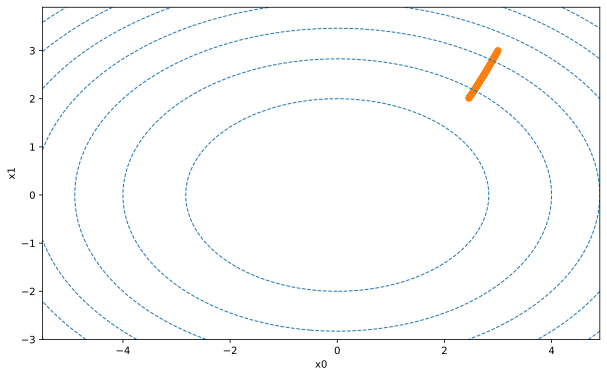

In [11]:
x0, x1 = res[:, 0], res[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁöÑ‰ºòÂåñÂáΩÊï∞

In [12]:
def grad_desc(lossfunc, w, x_dict, max_iters=200, learn_rate=0.005):
    """
    f: ÂæÖ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞, grad_f: fÁöÑÊ¢ØÂ∫¶, w: ÂèÇÊï∞ÂàùÂÄº, x_dict:Âõ∫ÂÆöÂèÇÊï∞ÂÄº, learn_rate: Â≠¶‰π†Áéá
    """
    trace_w = w.clone().data.reshape(1, -1)
    i = 0
    for i in range(max_iters):
        l = lossfunc(w=w, **x_dict)
        l.backward()
        w.data.sub_(learn_rate * w.grad.data)
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if (i + 1) % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i+1}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break

        w.grad.zero_()

    print(f"ÂÖ±Ëø≠‰ª£{i}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [13]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = grad_desc(meanSquaredLoss, w, x_dict = {'X': features, 'y': labels}, learn_rate=0.05)

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.6290
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.2814
Ëø≠‰ª£Ê¨°Êï∞: 30, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0305
Ëø≠‰ª£Ê¨°Êï∞: 40, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0034
Ëø≠‰ª£Ê¨°Êï∞: 50, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0005
Ëø≠‰ª£Ê¨°Êï∞: 60, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001
ÂÖ±Ëø≠‰ª£61Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[1.9982566833496094], [-3.3970322608947754], [4.196223258972168]]


ÁõÆÊ†áÂáΩÊï∞ÊúâÂÖ≥Ëá™ÂèòÈáèÁöÑÊ¢ØÂ∫¶‰ª£Ë°®‰∫ÜÁõÆÊ†áÂáΩÊï∞Âú®Ëá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆ‰∏ãÈôçÊúÄÂø´ÁöÑÊñπÂêë„ÄÇÂõ†Ê≠§ÔºåÊ¢ØÂ∫¶‰∏ãÈôç‰πüÂè´‰ΩúÊúÄÈô°‰∏ãÈôçÔºàsteepest descentÔºâ„ÄÇÂú®ÊØèÊ¨°Ëø≠‰ª£‰∏≠ÔºåÊ¢ØÂ∫¶‰∏ãÈôçÊ†πÊçÆËá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆÔºåÊ≤øÁùÄÂΩìÂâç‰ΩçÁΩÆÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞Ëá™ÂèòÈáè„ÄÇ

ÁÑ∂ËÄåÔºåÂ¶ÇÊûúËá™ÂèòÈáèÁöÑËø≠‰ª£ÊñπÂêë‰ªÖ‰ªÖÂèñÂÜ≥‰∫éËá™ÂèòÈáèÂΩìÂâç‰ΩçÁΩÆÔºåËøôÂèØËÉΩ‰ºöÂ∏¶Êù•‰∏Ä‰∫õÈóÆÈ¢ò„ÄÇ

‰æãÂ¶ÇÔºåÂêÑÁª¥Â∫¶‰∏äÁöÑÊ¢ØÂ∫¶ÂèòÂåñÈáè‰∏ç‰∏ÄËá¥Â∏¶Êù•ÁöÑÂ≠¶‰π†ÁéáÁöÑÊùÉË°°ÈóÆÈ¢òÔºöÂ¶ÇÊûúËÆæÁΩÆËøáÂ§ßÁöÑÂ≠¶‰π†ÁéáÔºåÂàôÂ∞ÜÈîôËøáÊúÄ‰ºòÁÇπÔºåÂá∫Áé∞ÈúáËç°ÂèëÊï£ÔºõÂ¶ÇÊûúËÆæÁΩÆËøáÂ∞èÁöÑÂ≠¶‰π†ÁéáÔºåÂàôÊî∂ÁéáÁºìÊÖ¢ÔºåÂú®ÁªôÂÆöËø≠‰ª£Êó∂Èó¥ÂÜÖÊú™ËææÂà∞ÊúÄ‰ºòÁÇπ„ÄÇÂõ†Ê≠§ÔºåÂêéÁª≠ÊèêÂá∫‰ª•Âä®ÈáèÂíåËá™ÈÄÇÂ∫îÁÆóÊ≥ï‰∏∫‰ª£Ë°®ÁöÑ‰ª•‰øÆÊ≠£Ëø≠‰ª£ÁÆóÊ≥ï„ÄÇ‰ª•‰∏ã‰ªãÁªçÂÖ∂‰∏≠ÁöÑ‰∏§Áßç‰ª£Ë°®ÊÄßÁÆóÊ≥ïÔºögradient descendent with momentÂíåadam„ÄÇ

## 2. Âä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôç(gradient descendent with moment)

ËÆæÊó∂Èó¥Ê≠•$t$ÁöÑËá™ÂèòÈáè‰∏∫$\boldsymbol{x}_t$ÔºåÂ≠¶‰π†Áéá‰∏∫$\eta_t$„ÄÇÂú®Êó∂Èó¥Ê≠•$0$ÔºåÂä®ÈáèÊ≥ïÂàõÂª∫ÈÄüÂ∫¶ÂèòÈáè$\boldsymbol{v}_0$ÔºåÂπ∂Â∞ÜÂÖ∂ÂÖÉÁ¥†ÂàùÂßãÂåñÊàê0„ÄÇÂú®Êó∂Èó¥Ê≠•$t>0$ÔºåÂä®ÈáèÊ≥ïÂØπÊØèÊ¨°Ëø≠‰ª£ÁöÑÊ≠•È™§ÂÅöÂ¶Ç‰∏ã‰øÆÊîπÔºö

$$
\begin{aligned}
\boldsymbol{v}_t &\leftarrow \gamma \boldsymbol{v}_{t-1} + \eta \boldsymbol{g}_t, \\
\boldsymbol{x}_t &\leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{v}_t,
\end{aligned}
$$

ÂÖ∂‰∏≠Ôºå$g_t$‰∏∫Ê¢ØÂ∫¶ÔºåÂä®ÈáèË∂ÖÂèÇÊï∞$\gamma$Êª°Ë∂≥$0 \leq \gamma < 1$„ÄÇÂΩì$\gamma=0$Êó∂ÔºåÂä®ÈáèÊ≥ïÁ≠â‰ª∑‰∫éÂ∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç„ÄÇ

Áõ∏ÂØπ‰∫éÂéüÁâàÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÔºåÂä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÊúâÂ¶Ç‰∏ã‰ºòÁÇπÔºö

- Âä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÁßªÂä®ÂæóÊõ¥Âø´(Âõ†‰∏∫ÂÆÉÁßØÁ¥ØÊâÄÊúâÂä®Èáè)
- Âä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÊúâÊú∫‰ºöÈÄÉËÑ±Â±ÄÈÉ®ÊûÅÂ∞èÂÄº(Âõ†‰∏∫Âä®ÈáèÂèØËÉΩÊé®Âä®ÂÆÉËÑ±Á¶ªÂ±ÄÈÉ®ÊûÅÂ∞èÂÄº)

- `numpy`ÂÆûÁé∞

In [14]:
def gd_momen_numpy(f, grad_f, x0, beta=0.5, learn_rate=0.05, max_iter=100):
    trace_x = np.array([x0])
    x = x0
    m_0 = 0
    i = 1
    while i <= max_iter:
        grad = grad_f(x)
        m_1 = beta*m_0 + learn_rate*grad
        x = x - m_1
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

        m_0 = m_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [15]:
res = gd_momen_numpy(f, grad_f, x0=np.array([3, 3]), learn_rate=0.5)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.597656
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.012394
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000278
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000009
Ëø≠‰ª£Ê¨°Êï∞: 25, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000000
ÂÖ±Ëø≠‰ª£27Ê¨°, ÁõÆÊ†áÂáΩÊï∞: 4.1710795617433405e-07, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [0.00036200881004333496, 0.0003781914710998535]


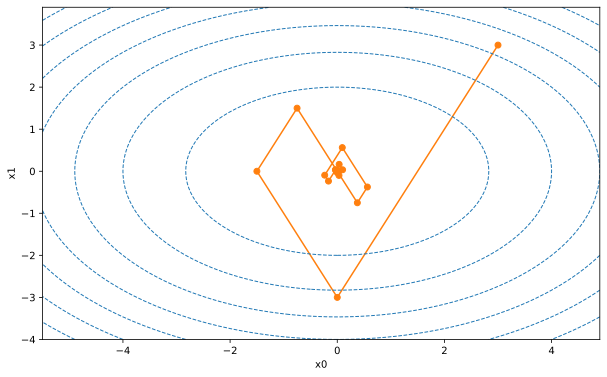

In [16]:
x0, x1 = res[:, 0], res[:, 1]

# display.set_matplotlib_formats("svg")
plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁâàÊú¨

In [17]:
def grad_desc_with_momentum(lossfunc, w, x_dict, beta=0.5, learn_rate=0.05, max_iter=1000):
    trace_w = w.clone().data.reshape(1, -1)
    v_0 = 0
    i = 1
    while i <= max_iter:
        l = lossfunc(w=w, **x_dict)
        l.backward()
        v_1 = beta*v_0 + learn_rate*w.grad.data
        w.data.sub_(v_1)
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if i % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break

        w.grad.zero_()
        v_0 = v_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{i-1}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [18]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = grad_desc_with_momentum(meanSquaredLoss, w, x_dict={'X': features, 'y': labels}, learn_rate=0.05)

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.1038
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0002
ÂÖ±Ëø≠‰ª£24Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[2.0004308223724365], [-3.4009571075439453], [4.200863838195801]]


## 3. ÈÄÇÂ∫îÊÄßÂä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôç(adaptive gradient descendent with moment)

ÁªôÂÆöË∂ÖÂèÇÊï∞$0 \leq \beta_1 < 1$ÔºàÁÆóÊ≥ï‰ΩúËÄÖÂª∫ËÆÆËÆæ‰∏∫0.9ÔºâÔºåÊó∂Èó¥Ê≠•$t$ÁöÑÂä®ÈáèÂèòÈáè$\boldsymbol{v}_t$Âç≥Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶$\boldsymbol{g}_t$ÁöÑÊåáÊï∞Âä†ÊùÉÁßªÂä®Âπ≥ÂùáÔºö

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t. $$

ÁªôÂÆöË∂ÖÂèÇÊï∞$0 \leq \beta_2 < 1$ÔºàÁÆóÊ≥ï‰ΩúËÄÖÂª∫ËÆÆËÆæ‰∏∫0.999ÔºâÔºåÂ∞ÜÂ∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊåâÂÖÉÁ¥†Âπ≥ÊñπÂêéÁöÑÈ°π$\boldsymbol{g}_t \odot \boldsymbol{g}_t$ÂÅöÊåáÊï∞Âä†ÊùÉÁßªÂä®Âπ≥ÂùáÂæóÂà∞$\boldsymbol{s}_t$Ôºö

$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

Áî±‰∫éÊàë‰ª¨Â∞Ü$\boldsymbol{v}_0$Âíå$\boldsymbol{s}_0$‰∏≠ÁöÑÂÖÉÁ¥†ÈÉΩÂàùÂßãÂåñ‰∏∫0Ôºå
Âú®Êó∂Èó¥Ê≠•$t$Êàë‰ª¨ÂæóÂà∞
$$\boldsymbol{v}_t =  (1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} \boldsymbol{g}_i.$$

Â∞ÜËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÁöÑÊùÉÂÄºÁõ∏Âä†ÔºåÂæóÂà∞ 
$$(1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} = 1 - \beta_1^t.$$

ÈúÄË¶ÅÊ≥®ÊÑèÁöÑÊòØÔºåÂΩì$t$ËæÉÂ∞èÊó∂ÔºåËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊùÉÂÄº‰πãÂíå‰ºöËæÉÂ∞è„ÄÇ‰æãÂ¶ÇÔºåÂΩì$\beta_1 = 0.9$Êó∂Ôºå$\boldsymbol{v}_1 = 0.1\boldsymbol{g}_1$„ÄÇ‰∏∫‰∫ÜÊ∂àÈô§ËøôÊ†∑ÁöÑÂΩ±ÂìçÔºåÂØπ‰∫é‰ªªÊÑèÊó∂Èó¥Ê≠•$t$ÔºåÊàë‰ª¨ÂèØ‰ª•Â∞Ü$\boldsymbol{v}_t$ÂÜçÈô§‰ª•$1 - \beta_1^t$Ôºå‰ªéËÄå‰ΩøËøáÂéªÂêÑÊó∂Èó¥Ê≠•Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶ÊùÉÂÄº‰πãÂíå‰∏∫1„ÄÇËøô‰πüÂè´‰Ωú**ÂÅèÂ∑Æ‰øÆÊ≠£**„ÄÇÂú®AdamÁÆóÊ≥ï‰∏≠ÔºåÊàë‰ª¨ÂØπÂèòÈáè$\boldsymbol{v}_t$Âíå$\boldsymbol{s}_t$Âùá‰ΩúÂÅèÂ∑Æ‰øÆÊ≠£Ôºö
$$\hat{\boldsymbol{v}}_t \leftarrow \frac{\boldsymbol{v}_t}{1 - \beta_1^t}, $$

$$\hat{\boldsymbol{s}}_t \leftarrow \frac{\boldsymbol{s}_t}{1 - \beta_2^t}. $$

Êé•‰∏ãÊù•ÔºåAdamÁÆóÊ≥ï‰ΩøÁî®‰ª•‰∏äÂÅèÂ∑Æ‰øÆÊ≠£ÂêéÁöÑÂèòÈáè$\hat{\boldsymbol{v}}_t$Âíå$\hat{\boldsymbol{s}}_t$ÔºåÂ∞ÜÊ®°ÂûãÂèÇÊï∞‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÁöÑÂ≠¶‰π†ÁéáÈÄöËøáÊåâÂÖÉÁ¥†ËøêÁÆóÈáçÊñ∞Ë∞ÉÊï¥Ôºö

$$\boldsymbol{g}_t' \leftarrow \frac{\eta \hat{\boldsymbol{v}}_t}{\sqrt{\hat{\boldsymbol{s}}_t} + \epsilon},$$

ÂÖ∂‰∏≠$\eta$ÊòØÂ≠¶‰π†ÁéáÔºå$\epsilon$ÊòØ‰∏∫‰∫ÜÁª¥ÊåÅÊï∞ÂÄºÁ®≥ÂÆöÊÄßËÄåÊ∑ªÂä†ÁöÑÂ∏∏Êï∞ÔºåÂ¶Ç$10^{-8}$„ÄÇÁõÆÊ†áÂáΩÊï∞Ëá™ÂèòÈáè‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÈÉΩÂàÜÂà´Êã•ÊúâËá™Â∑±ÁöÑÂ≠¶‰π†Áéá„ÄÇÊúÄÂêéÔºå‰ΩøÁî®$\boldsymbol{g}_t'$Ëø≠‰ª£Ëá™ÂèòÈáèÔºö

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}_t'. $$

## ADAMÁöÑÂéüÁêÜ

ADAMÁªìÂêà‰∫ÜÂä®ÈáèÂíåËá™ÈÄÇÂ∫îÂ≠¶‰π†Áéá‰∏§ÁßçÊäÄÊúØ

### 1. Ê†∏ÂøÉÊÄùÊÉ≥
Ëá™ÈÄÇÂ∫îÂä®ÈáèÊñπÊ≥ïÂêåÊó∂Áª¥Êä§‰∏§‰∏™‰ø°ÊÅØÔºö
- ‰∏ÄÈò∂Âä®ÈáèÔºàÊ¢ØÂ∫¶ÁöÑÊåáÊï∞ÁßªÂä®Âπ≥ÂùáÔºâÔºö‰øùÊåÅÊõ¥Êñ∞ÊñπÂêëÁöÑ‰∏ÄËá¥ÊÄß
- ‰∫åÈò∂Âä®ÈáèÔºàÊ¢ØÂ∫¶Âπ≥ÊñπÁöÑÊåáÊï∞ÁßªÂä®Âπ≥ÂùáÔºâÔºöËá™ÈÄÇÂ∫îË∞ÉÊï¥ÊØè‰∏™ÂèÇÊï∞ÁöÑÂ≠¶‰π†Áéá

ÂÖ≥ÈîÆÂàõÊñ∞Ôºö‰∏∫ÊØè‰∏™ÂèÇÊï∞Áã¨Á´ãÂú∞Ë∞ÉÊï¥Â≠¶‰π†ÁéáÔºåÂü∫‰∫éÂéÜÂè≤Ê¢ØÂ∫¶ÁöÑÂ§ßÂ∞è„ÄÇ

---

### 2. Adam ÁÆóÊ≥ïËØ¶Ëß£

#### Êõ¥Êñ∞ÂÖ¨ÂºèÔºö

ÂàùÂßãÂåñÔºö$m_0 = 0, v = 0$

Âú®Á¨¨ t Ê≠•Ôºö
1. ËÆ°ÁÆóÊ¢ØÂ∫¶Ôºö$g_t = \nabla L(\theta_t)$
2. Êõ¥Êñ∞‰∏ÄÈò∂Âä®ÈáèÔºö$m_t = \beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot g_t$
3. Êõ¥Êñ∞‰∫åÈò∂Âä®ÈáèÔºö$v_t = \beta_2 \cdot v_{t-1} + (1-\beta_2) \cdot g_t^2$
4. ÂÅèÂ∑Æ‰øÆÊ≠£Ôºö$mÃÇ_t = m_t/(1-\beta_1^t), vÃÇ_t = v_t/(1-\beta_2^t)$
5. ÂèÇÊï∞Êõ¥Êñ∞Ôºö$\theta_{t+1} = \theta_t - \eta \cdot mÃÇ_t/(\sqrt{vÃÇ_t} + \epsilon)$

#### ÂêÑÈÉ®ÂàÜ‰ΩúÁî®Ôºö
- $m_t$Ôºà‰∏ÄÈò∂Âä®ÈáèÔºâÔºöÊ¢ØÂ∫¶ÁöÑÊåáÊï∞Âä†ÊùÉÂπ≥ÂùáÔºåÊèê‰æõÊõ¥Êñ∞ÁöÑÊñπÂêëÂíåÂä®Èáè
- $v_t$Ôºà‰∫åÈò∂Âä®ÈáèÔºâÔºöÊ¢ØÂ∫¶Âπ≥ÊñπÁöÑÊåáÊï∞Âä†ÊùÉÂπ≥ÂùáÔºå‰º∞ËÆ°ÊØè‰∏™ÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶ÂπÖÂ∫¶
- ÂÅèÂ∑Æ‰øÆÊ≠£ÔºöÂàùÂßãÈò∂ÊÆµ $m$ Âíå $v$ ÂÅèÂêë 0ÔºåÈúÄË¶Å‰øÆÊ≠£
- Ëá™ÈÄÇÂ∫îÂ≠¶‰π†ÁéáÔºö$\eta/\sqrt{v_t}$ ‰ΩøÂæóÊ¢ØÂ∫¶Â§ßÁöÑÂèÇÊï∞Â≠¶‰π†ÁéáËá™Âä®ÂèòÂ∞è

---

### 3. ‰∏∫‰ªÄ‰πàËØ¥ÊòØ"Ëá™ÈÄÇÂ∫î"Ôºü

#### Ëá™ÈÄÇÂ∫îÁâπÊÄß‰ΩìÁé∞Âú®Ôºö
1. ÂèÇÊï∞Á∫ßÂà´ÁöÑÂ≠¶‰π†ÁéáË∞ÉÊï¥Ôºö
   - Ê¢ØÂ∫¶ÊåÅÁª≠Â§ßÁöÑÂèÇÊï∞ ‚Üí $v_t$ Â§ß ‚Üí Â≠¶‰π†ÁéáËá™Âä®Èôç‰Ωé
   - Ê¢ØÂ∫¶ÊåÅÁª≠Â∞èÁöÑÂèÇÊï∞ ‚Üí $v_t$ Â∞è ‚Üí Â≠¶‰π†ÁéáËá™Âä®ÊèêÈ´ò

2. ÂØπÁ®ÄÁñèÊ¢ØÂ∫¶ÂèãÂ•ΩÔºö
   - Á®ÄÁñèÁâπÂæÅÂæóÂà∞Êõ¥Â§ßÁöÑÂ≠¶‰π†Áéá
   - È¢ëÁπÅÊõ¥Êñ∞ÁöÑÁâπÂæÅÂ≠¶‰π†ÁéáÈÄêÊ∏êÈôç‰Ωé

3. Ëá™Âä®ÈÄÇÂ∫îÊçüÂ§±ÂáΩÊï∞Êõ≤ÁéáÔºö
   - Èô°Â≥≠ÊñπÂêëÔºàÊ¢ØÂ∫¶ÂèòÂåñÂ§ßÔºâ‚Üí Ëá™Âä®ÂáèÂ∞èÊ≠•Èïø
   - Âπ≥ÁºìÊñπÂêëÔºàÊ¢ØÂ∫¶ÂèòÂåñÂ∞èÔºâ‚Üí Ëá™Âä®Â¢ûÂ§ßÊ≠•Èïø

---

### 4. ‰∏éÂÖ∂‰ªñÊñπÊ≥ïÂØπÊØî

| ÁÆóÊ≥ï | ‰∏ÄÈò∂Âä®Èáè | ‰∫åÈò∂Âä®Èáè | Ëá™ÈÄÇÂ∫îÊÄß | ÁâπÁÇπ |
|------|---------|---------|---------|------|
| SGD | ‚úó | ‚úó | ‚úó | ÊúÄÂü∫Á°Ä |
| Momentum | ‚úì | ‚úó | ‚úó | Âä†ÈÄüÊî∂ÊïõÔºåÂáèÂ∞ëÈúáËç° |
| AdaGrad | ‚úó | ‚úì | ‚úì | Â≠¶‰π†ÁéáÂçïË∞ÉÈÄíÂáè |
| RMSProp | ‚úó | ‚úì | ‚úì | Ëß£ÂÜ≥ AdaGrad Â≠¶‰π†ÁéáË°∞ÂáèËøáÂø´ |
| Adam | ‚úì | ‚úì | ‚úì | ÁªºÂêà Momentum + RMSProp |
| AdamW | ‚úì | ‚úì | ‚úì | Adam + ÊùÉÈáçË°∞ÂáèËß£ËÄ¶ |

---

### 5. Áõ¥ËßÇÁêÜËß£

ÊÉ≥Ë±°‰Ω†Âú®‰∏Ä‰∏™Â±±Ë∞∑ÈáåÊâæÊúÄ‰ΩéÁÇπÔºö
- ÊôÆÈÄöÊ¢ØÂ∫¶‰∏ãÈôçÔºöÂÉè‰∏™ÈÜâÊ±âÔºåÊØèÊ≠•Âè™ÁúãÂΩìÂâçÂù°Â∫¶
- Âä®ÈáèÊ¢ØÂ∫¶‰∏ãÈôçÔºöÂÉè‰∏™ÊúâÊÉØÊÄßÁöÑÁêÉÔºå‰ºöÂÜ≤ËøáÂ∞èÂùë
- Ëá™ÈÄÇÂ∫îÊ¢ØÂ∫¶‰∏ãÈôçÔºöÊØè‰∏™ÊñπÂêëÁî®‰∏çÂêåÊ≠•ÈïøÔºåÈô°ÁöÑÊñπÂêëÂ∞èÊ≠•Ëµ∞
- AdamÔºàËá™ÈÄÇÂ∫îÂä®ÈáèÔºâÔºöÊó¢ÊúâÊÉØÊÄßÂèà‰ºöËá™Âä®Ë∞ÉÊï¥ÂêÑÊñπÂêëÊ≠•ÈïøÁöÑÊô∫ËÉΩÁêÉ

#### ‰ºòÂäøÔºö
- ‚úÖ ÂØπË∂ÖÂèÇÊï∞‰∏çÂ§™ÊïèÊÑüÔºàÈªòËÆ§ÂÄºÈÄöÂ∏∏Â∞±ÂæàÂ•ΩÔºâ
- ‚úÖ ÈÄÇÂêàÁ®ÄÁñèÊ¢ØÂ∫¶ÂíåÈùûÂπ≥Á®≥ÁõÆÊ†á
- ‚úÖ ËÆ°ÁÆóÊïàÁéáÈ´òÔºåÂÜÖÂ≠òÂç†Áî®ÂêàÁêÜ
- ‚úÖ ÈÄÇÂêàÂ§ßËßÑÊ®°Êï∞ÊçÆÂíåÂèÇÊï∞

#### ÊΩúÂú®ÈóÆÈ¢òÔºö
- ‚ö†Ô∏è Êüê‰∫õÊÉÖÂÜµ‰∏ãÂèØËÉΩ‰∏çÊî∂ÊïõÂà∞ÊúÄ‰ºòÔºàÈúÄË¶ÅË∞ÉÊï¥ Œµ ÊàñÂ≠¶‰π†ÁéáÔºâ
- ‚ö†Ô∏è ‰∫åÈò∂Âä®ÈáèÂèØËÉΩÁ¥ØÁßØËøáÂ§öÂéÜÂè≤‰ø°ÊÅØ
- ‚ö†Ô∏è Âú®Êüê‰∫õ‰ªªÂä°‰∏ä SGD+Momentum Ê≥õÂåñÊÄßËÉΩÊõ¥Â•Ω

---

### 6. ÂÆûË∑µÂª∫ËÆÆ

ÈªòËÆ§Ë∂ÖÂèÇÊï∞ÔºàÈÄöÂ∏∏ÊïàÊûúÂ∞±ÂæàÂ•ΩÔºâÔºö
- $\beta_1 = 0.9$Ôºà‰∏ÄÈò∂Âä®ÈáèÁ≥ªÊï∞Ôºâ
- $\beta_2 = 0.999$Ôºà‰∫åÈò∂Âä®ÈáèÁ≥ªÊï∞Ôºâ
- $\epsilon = 1e-8$ÔºàÊï∞ÂÄºÁ®≥ÂÆöÊÄßÔºâ
- $\eta = 0.001$ÔºàÂàùÂßãÂ≠¶‰π†ÁéáÔºâ


## ‰ªÄ‰πàÊó∂ÂÄôÁî® Adam?
- ËÆ≠ÁªÉ Transformer„ÄÅBERT Á≠âÂ§ßÊ®°Âûã
- Á®ÄÁñèÊï∞ÊçÆÔºàÂ¶Ç NLP„ÄÅÊé®ËçêÁ≥ªÁªüÔºâ
- ÈúÄË¶ÅÂø´ÈÄüÊî∂ÊïõÁöÑÂéüÂûãÈ™åËØÅ

## ‰ªÄ‰πàÊó∂ÂÄôËÄÉËôëÂÖ∂‰ªñ?

- ËÆ°ÁÆóÊú∫ËßÜËßâÁöÑ CNNÔºöSGD+Momentum ÊúâÊó∂Ê≥õÂåñÊõ¥Â•Ω
- ÈúÄË¶ÅÊûÅËá¥Ê≥õÂåñÊÄßËÉΩÔºöÂèØÂ∞ùËØï SGD Êàñ AdamW
- ËµÑÊ∫êÂèóÈôêÔºöSGD ÂÜÖÂ≠òÂç†Áî®ÊúÄÂ∞ë


- `numpy`ÂÆûÁé∞

In [19]:
def adam_numpy(f, grad_f, x0, beta1=0.9, beta2=0.999, learn_rate=0.05, max_iter=100, epsilon=1e-8):
    trace_x = np.array([x0])
    x = x0
    m_0, v_0 = 0, 0
    i = 1
    while i <= max_iter:
        grad = grad_f(x)
        m_1 = (beta1 * m_0 + (1 - beta1) * grad) / (1 - beta1**i)
        v_1 = (beta2 * v_0 + (1 - beta2) * grad**2) / (1 - beta2**i)
        x = x - learn_rate * m_1 / (np.sqrt(v_1) + epsilon)
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        if i % 5 == 0:
            print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
            break

        m_0, v_0 = m_1, v_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{len(trace_x)}Ê¨°, ÁõÆÊ†áÂáΩÊï∞: {f(x)}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {x.tolist()}")
    return trace_x

In [20]:
res = adam_numpy(f, grad_f, x0=np.array([3, 3]), beta1=0.6, beta2=0.5, max_iter=200, learn_rate=0.3)

Ëø≠‰ª£Ê¨°Êï∞: 5, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 2.485937
Ëø≠‰ª£Ê¨°Êï∞: 10, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 1.049189
Ëø≠‰ª£Ê¨°Êï∞: 15, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.153593
Ëø≠‰ª£Ê¨°Êï∞: 20, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000938
Ëø≠‰ª£Ê¨°Êï∞: 25, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.012662
Ëø≠‰ª£Ê¨°Êï∞: 30, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000254
Ëø≠‰ª£Ê¨°Êï∞: 35, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.005913
Ëø≠‰ª£Ê¨°Êï∞: 40, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.011896
Ëø≠‰ª£Ê¨°Êï∞: 45, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000084
Ëø≠‰ª£Ê¨°Êï∞: 50, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.007040
Ëø≠‰ª£Ê¨°Êï∞: 55, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.010319
Ëø≠‰ª£Ê¨°Êï∞: 60, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000000
Ëø≠‰ª£Ê¨°Êï∞: 65, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.008121
Ëø≠‰ª£Ê¨°Êï∞: 70, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.009041
Ëø≠‰ª£Ê¨°Êï∞: 75, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000104
Ëø≠‰ª£Ê¨°Êï∞: 80, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.009186
Ëø≠‰ª£Ê¨°Êï∞: 85, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.007669
Ëø≠‰ª£Ê¨°Êï∞: 90, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000367
Ëø≠‰ª£Ê¨°Êï∞: 95, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.010275
Ëø≠‰ª£Ê¨°Êï∞: 100, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.006237
Ëø≠‰ª£Ê¨°Êï∞: 105, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.000733
Ëø≠‰ª£Ê¨°Êï∞: 110, ÁõÆÊ†áÂáΩÊï∞ÂÄºf: 0.011310
Ëø≠‰ª£Ê¨

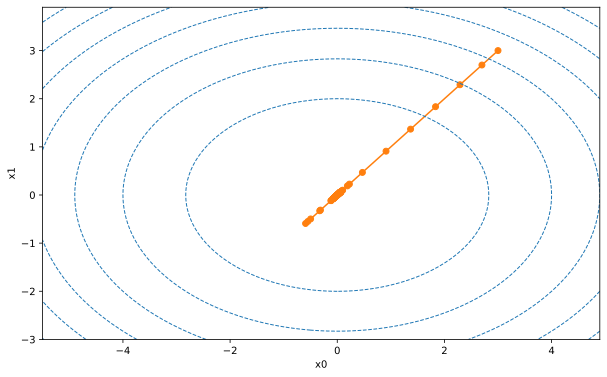

In [21]:
x0, x1 = res[:, 0], res[:, 1]
# display.set_matplotlib_formats("svg")
plt.figure(figsize=(10, 6))
plt.plot(x0, x1, "-o", color="#ff7f0e")
x0 = np.arange(-5.5, 5.0, 0.1)
x1 = np.arange(min(-3.0, min(x1) - 1), max(1.0, max(x1) + 1), 0.1)
x0, x1 = np.meshgrid(x0, x1)
plt.contour(x0, x1, f([x0, x1]), colors="#1f77b4", linewidths=1, linestyles="dashed")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

- `torch`ÂÆûÁé∞Êõ¥ÈÄöÁî®ÁâàÊú¨

In [ ]:
def adaptive_momentum(lossfunc, w, x_dict, beta1=0.5, beta2=0.9, learn_rate=0.999, max_iter=1000, epsilon=1e-8):
    trace_w = w.clone().data.reshape(1, -1)
    v_0, s_0 = 0, 0
    i = 1
    while i <= max_iter:
        l = lossfunc(w=w, **x_dict)
        l.backward() 
        v_1 = (beta1*v_0 + (1 - beta1)*w.grad.data) / (1 - beta1**i)
        s_1 = (beta2*s_0 + (1 - beta2)*w.grad.data**2) / (1 - beta2**i)
        w.data.sub_(learn_rate * v_1/(torch.sqrt(s_1) + epsilon))
        with torch.no_grad():
            trace_w = torch.cat([trace_w, w.detach().data.reshape(1, -1)], 0)
            if i % 10 == 0:
                loss = lossfunc(w=w, **x_dict).data.numpy()
                print(f"Ëø≠‰ª£Ê¨°Êï∞: {i}, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {loss:.4f}")
            
            if torch.sum(torch.abs(trace_w[-1] - trace_w[-2])) < 1e-3:  # ÂÅúÊ≠¢Êù°‰ª∂
                break

        w.grad.zero_()
        v_0, s_0 = v_1, s_1
        i += 1

    print(f"ÂÖ±Ëø≠‰ª£{i - 1}Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: {lossfunc(w=w, **x_dict).data.numpy():.4f}, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: {w.tolist()}")
    return trace_w

In [23]:
w = torch.randn(num_inputs, 1)
w.requires_grad_(True)
trace_w = adaptive_momentum(meanSquaredLoss, w, x_dict={'X': features, 'y': labels})

Ëø≠‰ª£Ê¨°Êï∞: 10, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 14.9253
Ëø≠‰ª£Ê¨°Êï∞: 20, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 13.7509
Ëø≠‰ª£Ê¨°Êï∞: 30, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 12.8042
Ëø≠‰ª£Ê¨°Êï∞: 40, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 11.6086
Ëø≠‰ª£Ê¨°Êï∞: 50, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 9.9418
Ëø≠‰ª£Ê¨°Êï∞: 60, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 7.6850
Ëø≠‰ª£Ê¨°Êï∞: 70, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 4.9636
Ëø≠‰ª£Ê¨°Êï∞: 80, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 2.3349
Ëø≠‰ª£Ê¨°Êï∞: 90, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.6175
Ëø≠‰ª£Ê¨°Êï∞: 100, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0531
Ëø≠‰ª£Ê¨°Êï∞: 110, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0004
ÂÖ±Ëø≠‰ª£115Ê¨°, ÊçüÂ§±ÂáΩÊï∞ÂÄº: 0.0001, ÊúÄ‰ºòÂèÇÊï∞ÂÄº: [[1.999524474143982], [-3.401027202606201], [4.200621128082275]]


## 4. ÂÖ∂ÂÆÉ‰ºòÂåñÁÆóÊ≥ï
- ÁΩëÊ†ºÊêúÁ¥¢
- ÈÅó‰º†ÁÆóÊ≥ï
- Á≤íÂ≠êÁæ§ÁÆóÊ≥ï
- Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ï
- ËöÅÁæ§ÁÆóÊ≥ï

In [ ]:
def f(x):
    """
    ÂáΩÊï∞: f(x0, x1) = x0**2 + 2*x1**2
    """
    return x[0] ** 2 + 2 * x[1] ** 2  # objective

In [60]:
grids = [(x, y) for x in np.linspace(-2, 2, num=100) for y in np.linspace(-2, 2, num=100)]
res = [(f(x), x) for x in grids]    
sorted(res, key=lambda x:x[0])[0]

(0.001224364860728486, (-0.02020202020202011, -0.02020202020202011))

## ÂèÇËÄÉËµÑÊñô
1. ÊùéËà™. ÁªüËÆ°Â≠¶‰π†ÊñπÊ≥ï. 2017.
2. [ÈòøÊñØÈ°ø¬∑Âº†„ÄÅÊùéÊ≤ê„ÄÅÊâéÂç°Èáå C. Á´ãÈ°ø„ÄÅ‰∫öÂéÜÂ±±Â§ß J. ÊñØËé´ÊãâÁ≠â. Âä®ÊâãÂ≠¶Ê∑±Â∫¶Â≠¶‰π†. 2020.](https://github.com/d2l-ai/d2l-zh)